In [53]:
# 06_pca_tsne (n)
# 1. Dla danych z zadania z 05 wykonaj:
# PCA dla n_components = [2 ,4, 6] i wyświetl wartość explained_variance_ratio_
# utwórz wykres typu "słupkowego" dla wszystkich n_components_
# oblicz n_components_, które zachowają wariancję na poziomie 95%
# 2. Dla datasetu z projektu:
# utwórz scatter plot, korzystając z:
# t-SNE*
# PCA + t-SNE (skorzystaj z Pipeline lub make_pipeline)
# porównaj czas oraz "jakość" powyższych wykresów
# 3. Zaimplementuj GridsearchCV oraz kPCA dla danych z pkt. 2:
# znajdź najlepszy kernel oraz parametr gamma (zacznij od np.linespace(0.03, 0.05, 5))
# wybierz dowolny klasyfikator

# * Jeżeli czas utworzenia wykresu z wykorzystaniem t-SNE jest za długi,  zmniejsz dataset (wybierz losowe obserwacje)

# Rozwiązanie prześlij jako printscreen (jpg, pdf).
# Nazwa pliku (bez polskich znaków):

# Nazwisko_Imie_06_niestacj.jpg

In [54]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
seed = np.random.seed(203)

In [56]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [57]:
X = mnist["data"]
y = mnist["target"]
X.shape

(70000, 784)

In [58]:
img = X[5]
img = img.reshape(28, 28)

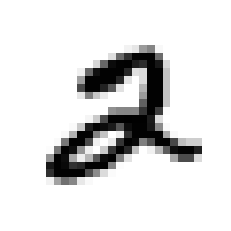

2


In [59]:
plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

print(y[5])

In [60]:
pca_2 = PCA(n_components=4, random_state=seed)
pca_2.fit(X)

PCA(n_components=4)

In [61]:
expl_ratio_2 = pca_2.explained_variance_ratio_
expl_ratio_2

array([0.09746116, 0.07155445, 0.06149531, 0.05403385])

In [62]:
print(np.cumsum(expl_ratio_2))
print(np.sum(expl_ratio_2))

[0.09746116 0.16901561 0.23051091 0.28454476]
0.28454475987737393


In [63]:
pca = PCA(random_state=seed)
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [64]:
d = np.argmax(cumsum >= 0.95) + 1
# print(cumsum)
# print(d)

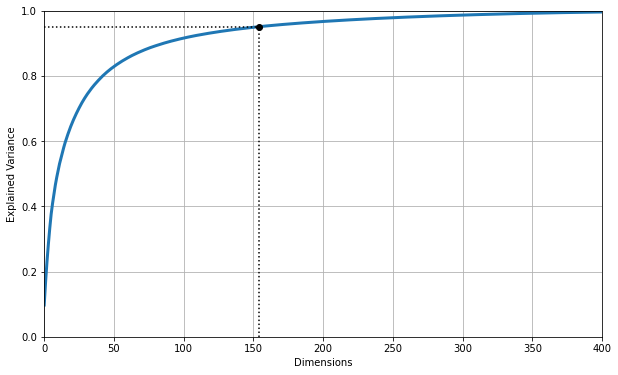

In [65]:
plt.figure(figsize=(10,6))

plt.plot(cumsum, linewidth=3)

plt.axis([0, 400, 0 , 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.plot([d,d], [0, 0.95], "k:")
plt.plot([0,d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
           
plt.grid()
plt.show()

In [66]:
pca = PCA(n_components=0.95, random_state=seed)
x_reduced = pca.fit_transform(X)

pca.n_components_

154

In [67]:
np.sum(pca.explained_variance_ratio_)

0.9503499702078613

# 1

In [68]:
from sklearn.datasets import load_wine
import pandas as pd

In [69]:
# load and return the diabetes dataset (classification).
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [70]:
# data, target assignments
X, y = wine.data, wine.target

In [71]:
elements = [2, 4, 6]
ele_sum = []

In [72]:
for ele in elements:
    pca = PCA(n_components=ele, random_state=seed)
    pca.fit(X)
    
    expl_ratio = pca.explained_variance_ratio_
    print(expl_ratio)
    
    expl_ratio_sum = sum(expl_ratio)
    ele_sum.append(expl_ratio_sum)

[0.99809123 0.00173592]
[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05]
[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06]


In [73]:
df_to_plot = pd.DataFrame(ele_sum, index=elements, columns=["expl_ratio"])
df_to_plot.index.name = "n. of components"

<AxesSubplot:xlabel='n. of components'>

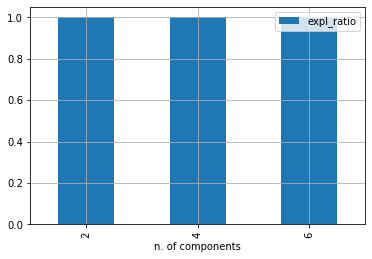

In [74]:
df_to_plot.plot(kind="bar", grid=True)

In [75]:
pca = PCA(n_components=0.95, random_state=seed)
x_reduced = pca.fit_transform(X)

pca.n_components_

1

# 2

https://drive.google.com/drive/folders/1kTundijeYX-E-ze4Dm5DqEVsH1o1YJf9?usp=sharinghttps://drive.google.com/drive/folders/1kTundijeYX-E-ze4Dm5DqEVsH1o1YJf9?usp=sharing

In [76]:
data = pd.read_csv("project_data/test_data.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,179.171,102.366,-90318.459,-76354.589,-30178.335,617.269,-1282.834,-1096.950,171.635,-19.206,...,-43.192,-224.675,12.324,232.965,152.504,122.130,107.225,565.803,537.527,-60.706
1,106.673,-63.988,14393.611,-23722.852,-9392.469,449.456,-562.289,-536.924,-1162.814,168.002,...,-390.906,-49.040,94.748,-168.545,612.119,-216.957,-5.355,-315.510,-145.489,-1254.983
2,-4.873,-205.671,-28555.498,7933.658,4245.138,1603.993,-914.152,1449.421,-700.017,460.350,...,-0.575,162.502,178.716,-403.328,504.106,179.730,-186.519,481.705,-404.409,-896.072
3,-190.940,195.398,7372.475,-57092.149,21447.785,508.022,1256.862,1498.347,569.061,16.259,...,19.651,-18.126,104.865,336.881,1799.097,359.658,102.798,242.973,-536.491,316.552
4,-235.533,332.318,47801.547,-48097.081,-8387.428,-1062.866,-511.930,908.649,-424.938,322.100,...,-302.825,-358.884,-94.971,109.459,189.027,-990.600,125.996,-1309.715,-510.876,768.972


In [77]:
import time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [78]:
# just take 0.2 of our data
data_02, data_08 = train_test_split(data, test_size=0.8, random_state=seed)

In [79]:
# standar scaling
scaler = StandardScaler().fit(data_02)
data_std = scaler.transform(data_02)

In [80]:
# dimensionality reduction pca
pca = PCA(n_components=2, whiten=True, random_state=seed)
pca_data = pca.fit_transform(data_std)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.0050757  0.00502607]
[112.64657385 112.09451995]


In [81]:
# dimensionality reduction tsne
tsne = TSNE(n_components=2, random_state=seed)
tsne_data = tsne.fit_transform(data_std)

#print(tsne.embedding_)
print(tsne.kl_divergence_)

1.0782794952392578


In [82]:
data_sets = [pca_data, tsne_data]
data_names = ["pca_data", "tsne_data"]

time of 1 plot: 0.03999948501586914 seconds
time of 1 plot: 0.026995182037353516 seconds


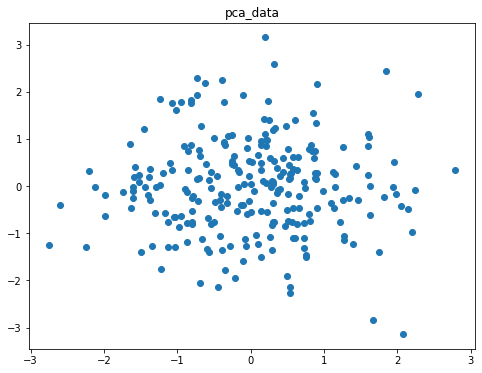

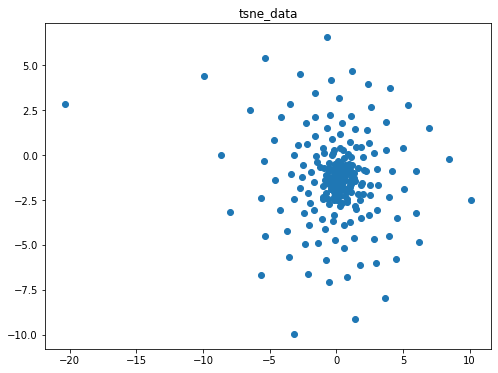

In [83]:
# plots 
for i, n in zip(data_sets, data_names):
    plt.figure(figsize=(8, 6))
    start_time = time.time()
    plt.scatter(i[:, 0], i[:, 1])
    end_time = time.time()
    plt.title(n)
    print(f"time of 1 plot: {end_time - start_time} seconds")

In [84]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [85]:
# compute clustering with MeanShift

for d, n in zip(data_sets, data_names):
    # the following bandwidth can be automatically detected using
    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(d)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    print(f"number of estimated clusters : {n_clusters_} for {n}")

number of estimated clusters : 1 for pca_data
number of estimated clusters : 1 for tsne_data


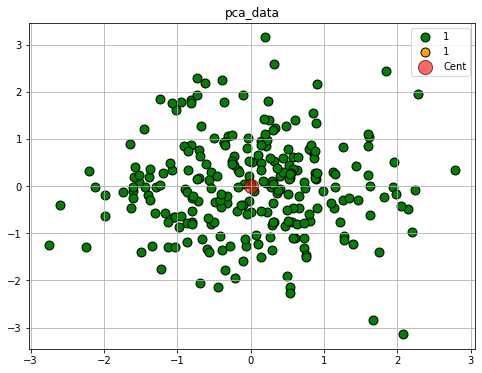

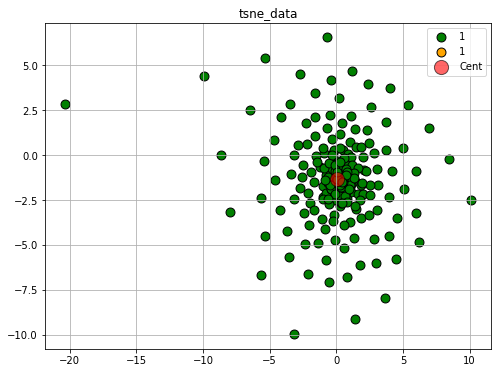

In [86]:
# plot clusters with centro
for d, n in zip(data_sets, data_names):
    km_cls = KMeans(
        n_clusters=1,
        init='random',
        n_init=10,
        max_iter=300,
        random_state=seed
    )

    y_km = km_cls.fit_predict(d)

    plt.figure(figsize=(8, 6))
    plt.scatter(
        d[y_km == 0, 0],
        d[y_km == 0, 1],
        c='green', edgecolor='black',
        label='1', s=80
    )

    plt.scatter(
        d[y_km == 1, 0],
        d[y_km == 1, 1],
        c='orange', edgecolor='black',
        label='1', s=80
    )

    plt.scatter(
        km_cls.cluster_centers_[:, 0],
        km_cls.cluster_centers_[:, 1],
        c='r', marker="o", s=200, alpha=0.6,
        edgecolor="black", label='Cent'
    )
    
    plt.title(n)
    plt.legend()
    plt.grid()
    plt.show()

In [87]:
# define pipeline
pipe = Pipeline([
    ("std", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=seed)),
    ("tsne", TSNE(n_components=2, random_state=seed)),
])

In [88]:
# fit transform method
piped = pipe.fit_transform(data_02)

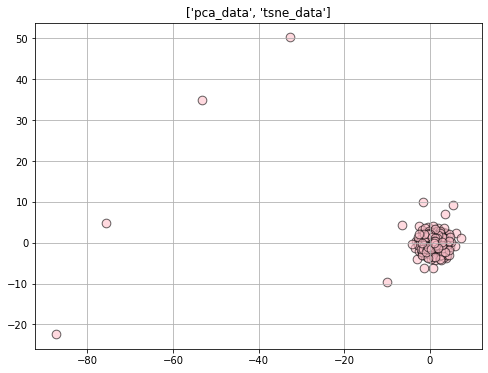

In [102]:
# scatter for claster visibility
plt.figure(figsize=(8, 6))
plt.scatter(
    piped[:, 0],
    piped[:, 1],
    s=75, c="pink",
    marker="o", 
    alpha=0.6,
    edgecolor="black"
    )

plt.title(data_names)
plt.grid()
plt.show()

# 3

In [ ]:
# 3. Zaimplementuj GridsearchCV oraz kPCA dla danych z pkt. 2:
# znajdź najlepszy kernel oraz parametr gamma (zacznij od np.linespace(0.03, 0.05, 5))
# wybierz dowolny klasyfikator